<a href="https://colab.research.google.com/github/Vivek-Joshi17/CNN_neural_network/blob/main/Multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-class Image Classification
1. Understand the data
2. Preprocess the data
3. Create model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameter and improve the  model(try to beat baseline reducr overfitting)
7. Repeat until satisfied


In [1]:
## 1. import dataset
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close

--2024-01-24 17:18:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 173.194.195.207, 173.194.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   214MB/s    in 2.3s    

2024-01-24 17:18:58 (214 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



<bound method ZipFile.close of <zipfile.ZipFile filename='10_food_classes_all_data.zip' mode='r'>>

In [2]:
import os
#walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ice_

In [3]:
train_dir ="10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np
data_dir  = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_images(target_dir,target_class):
  # set up target directory
  target_folder =target_dir+"/" +target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read and plot image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"Image shape: {img.shape}")

  return img

['918053.jpg']
Image shape: (512, 512, 3)


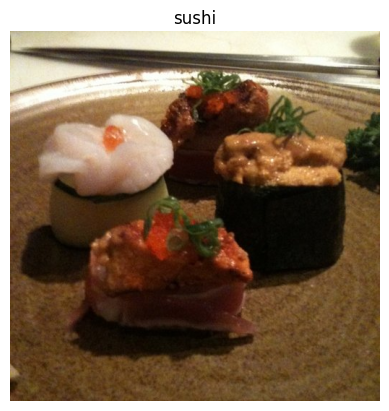

In [6]:
import random
img =view_random_images(target_dir = train_dir,target_class = random.choice(class_names))


### 2. Preprocess the dat(prepare it for model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size =32,
                                               class_mode ='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= (224,224),
                                             batch_size =32,
                                             class_mode ="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Creating the model

In [8]:
import tensorflow as tf
# replicating CNN-explainer CNN neural network
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size =3,strides =1,padding = "valid",activation ="relu",input_shape =(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation ="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation ="relu"),
    tf.keras.layers.Conv2D(10,3,activation ="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation ="softmax")
])
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [9]:
IMG_SIZE = (224,224)

In [10]:
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 122ms/step - loss: 2.1299 - accuracy: 0.2216 - val_loss: 1.9826 - val_accuracy: 0.2960
Epoch 2/5
235/235 [==============================] - 32s 137ms/step - loss: 1.8600 - accuracy: 0.3579 - val_loss: 1.9124 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 38s 162ms/step - loss: 1.5773 - accuracy: 0.4691 - val_loss: 1.8801 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 33s 141ms/step - loss: 1.0797 - accuracy: 0.6453 - val_loss: 2.3079 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 31s 131ms/step - loss: 0.5438 - accuracy: 0.8307 - val_loss: 3.0558 - val_accuracy: 0.2744


##5. Evaluate the model

In [11]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 3.0558 - accuracy: 0.2744


[3.055785894393921, 0.274399995803833]

In [14]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

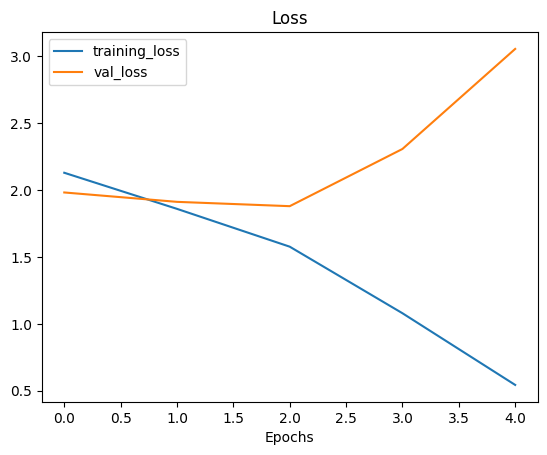

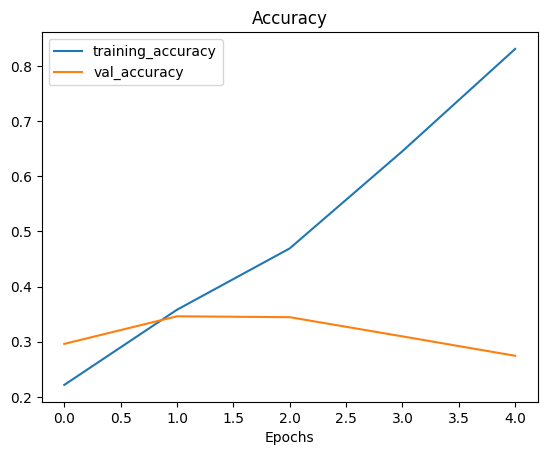

In [15]:
plot_loss_curves(history_1)

It seems our model is overfitting the training set quite badly, It's getting great results on the training data but fails to generlize well to unseen data and performs poorly on the test

##6. Adjuast the model hyperparameters(ro beat baseline/reduce overfitting)

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce layers or reduce hidden units in layers
* **Use data augmentation** - data augmentation manupulates the training data in such a way to add more diversity to it.
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own datset


# Simply the mode

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="relu")
])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [23]:
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 111ms/step - loss: 11.6102 - accuracy: 0.1229 - val_loss: 11.5731 - val_accuracy: 0.1836
Epoch 2/5
235/235 [==============================] - 25s 108ms/step - loss: 11.6109 - accuracy: 0.1428 - val_loss: 11.6257 - val_accuracy: 0.1628
Epoch 3/5
235/235 [==============================] - 26s 110ms/step - loss: 11.5966 - accuracy: 0.1595 - val_loss: 11.5833 - val_accuracy: 0.1728
Epoch 4/5
235/235 [==============================] - 26s 109ms/step - loss: 11.6218 - accuracy: 0.1152 - val_loss: 11.6135 - val_accuracy: 0.1008
Epoch 5/5
235/235 [==============================] - 27s 113ms/step - loss: 11.6090 - accuracy: 0.1168 - val_loss: 11.6066 - val_accuracy: 0.1224


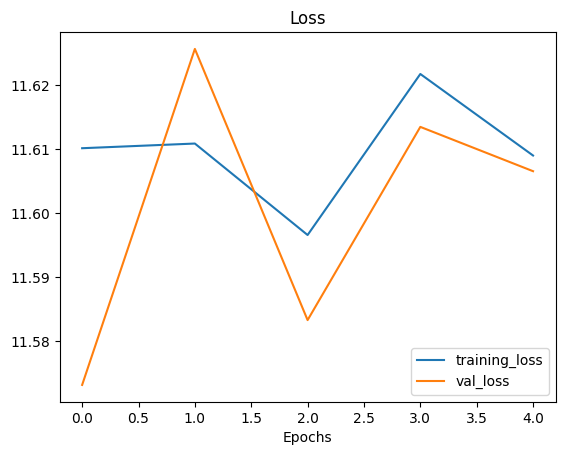

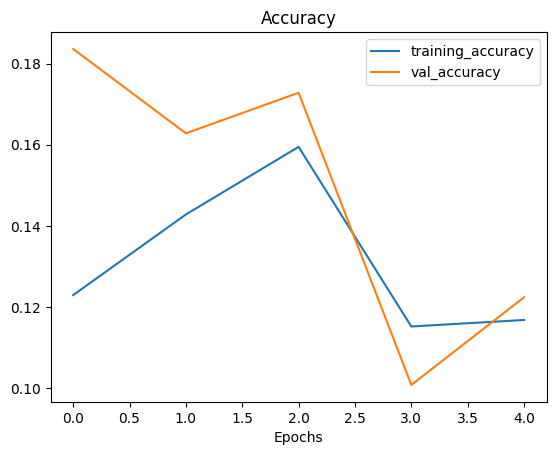

In [24]:
#checking the loss curve
plot_loss_curves(history_2)

Trying data augmentation

In [26]:
# creating an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range =0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip =True)
train_data_augmented = train_datagen_augmented.flow_from_directory( train_dir,
                                                                    target_size =(224,224),
                                                                    batch_size = 32,
                                                                    class_mode = "categorical")

Found 7500 images belonging to 10 classes.


create the model with new augmented data

In [27]:
model_3 =tf.keras.models.clone_model(model_1)

#compile the cloned model
model_3.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

In [28]:
#fit the model
history_3 =model_3.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 102s 426ms/step - loss: 2.2081 - accuracy: 0.1837 - val_loss: 2.0480 - val_accuracy: 0.2696
Epoch 2/5
235/235 [==============================] - 102s 433ms/step - loss: 2.0702 - accuracy: 0.2627 - val_loss: 1.9501 - val_accuracy: 0.3132
Epoch 3/5
235/235 [==============================] - 105s 445ms/step - loss: 2.0459 - accuracy: 0.2689 - val_loss: 1.9020 - val_accuracy: 0.3372
Epoch 4/5
235/235 [==============================] - 101s 429ms/step - loss: 2.0015 - accuracy: 0.2983 - val_loss: 1.8180 - val_accuracy: 0.3676
Epoch 5/5
235/235 [==============================] - 100s 427ms/step - loss: 1.9802 - accuracy: 0.3065 - val_loss: 1.8107 - val_accuracy: 0.3700


In [31]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 1.8107 - accuracy: 0.3700


[1.8107470273971558, 0.3700000047683716]

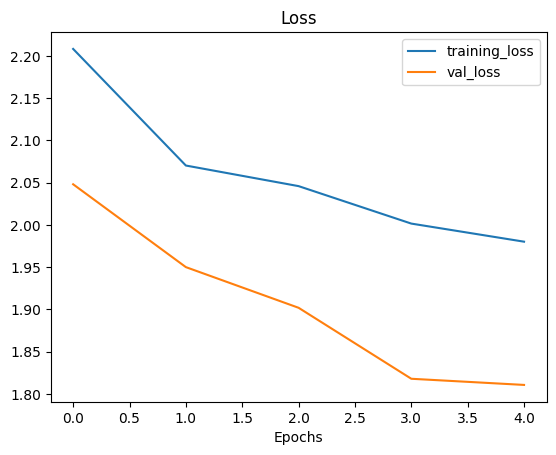

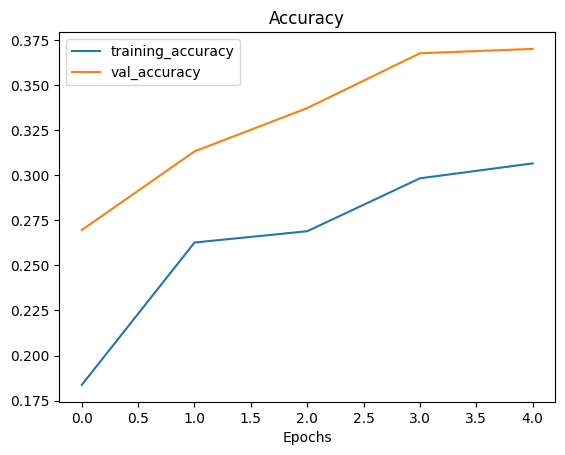

In [32]:
plot_loss_curves(history_3)

* **restructuring models architecture** - increasing layers/hidden unis
* **adjust the learning rate**
* **fitting for longer**

#making prediction with our model

In [70]:
!wget -q https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget -q https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget -q https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

In [87]:
def load_and_prep_image(filename, img_shape=224):
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure correct color channels
    img = tf.image.decode_image(img, channels=-1)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img / 255.
    return img

In [88]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 318ms/step


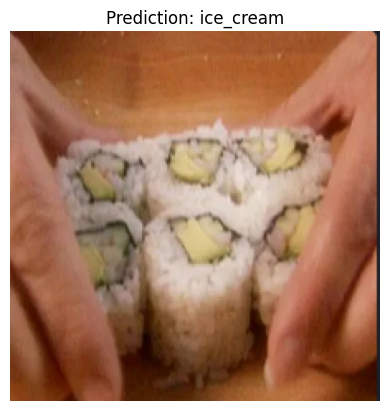

In [91]:
pred_and_plot(model=model_3,filename = "sushi.jpg",class_names=class_names)